In [1]:
#pip install librosa
import librosa
x, sr = librosa.load('C:/data/cats_dog/cats_dogs/dog_barking_0.wav')

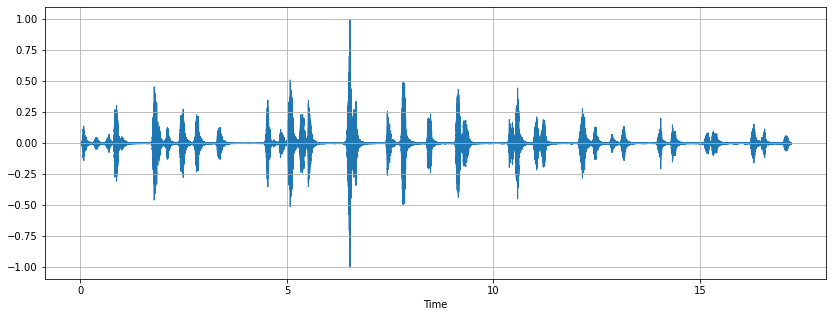

In [2]:
# matplotlib.pyplot.plot()으로 출력하면 되긴 하지만, 
# 이것 저것 설정하는것이 귀찮다면, waveplot으로 wave의 파형을 출력해 볼 수 있다.
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14,5))
librosa.display.waveshow (x, sr=sr)
plt.grid()

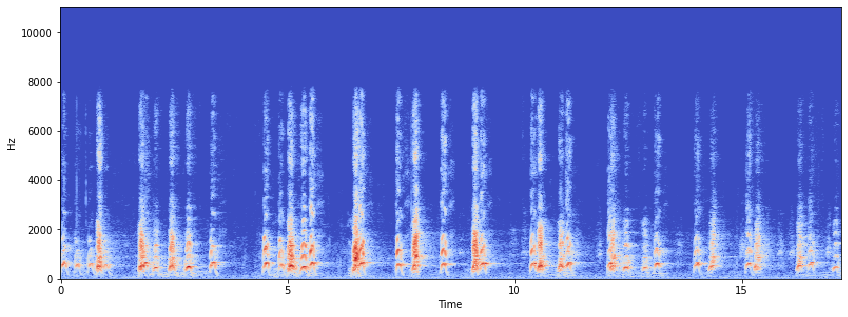

In [3]:
#Frequency Domain - STFT(Short Time Fourier Transform)
# FTT를 짧은 Frame단위로 구해준다.
X = librosa.stft(x)  #복소수(Complex) 반환
Xdb = librosa.amplitude_to_db(abs(X)) #실제 신호의 크기(Magnitude) 를 데시벨(신호의 세기)로 변환
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

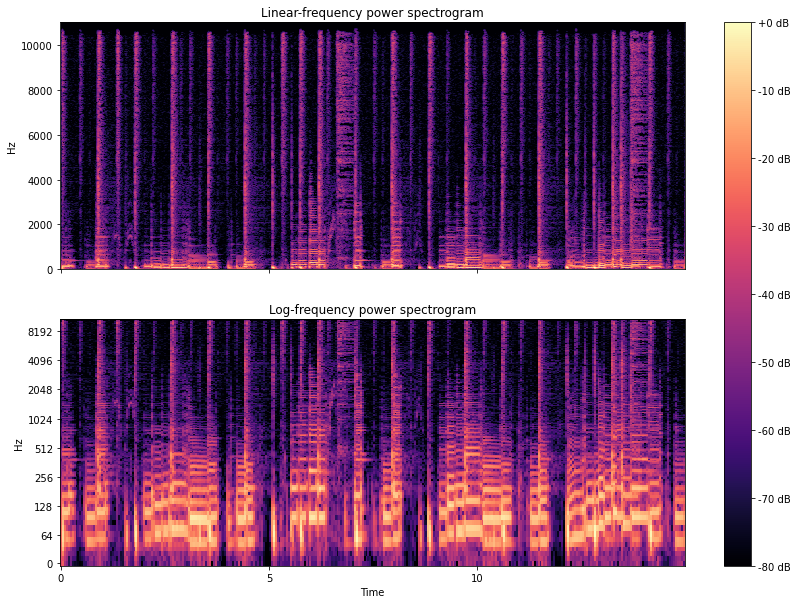

In [9]:
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(librosa.ex('choice'), duration=15)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,10), sharex=True)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

#y축을 log scale로 변환
#사람은 소리를 들을 때 
# High Freq로 갈수록 상대적으로 약하게 듣고,
# 넓은 Freq로 갈수록 축약해서 듣는 경향이 있다.
hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")
